# Will This Customer Purchase Your Product? - Data Analysis and Predictive Model

## 1. Project Objective
Analyze online shopping sessions during the busiest months (November & December) to:
1. Calculate purchase rates for New vs. Returning customers.
2. Identify the strongest correlation between time spent on different page types for returning customers.
3. Assess the probability of achieving at least 100 sales out of 500 sessions under a campaign boosting purchase rate by 15%.


In [1]:
## 2. Environment Setup
# Python_Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
## 3. Data Loading
shopping_data= pd.read_csv(r"C:\Users\harsh\Downloads\workspace (1)\workspace\online_shopping_session_data.csv")
#quick look
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [3]:
## 4. Data Overview
# Shape and types
print(f"Rows, columns: {shopping_data.shape}")
shopping_data.info()
# Basic Statistics
shopping_data.describe()
# Unique months and customer types
print("months:", shopping_data['Month'].unique())
print("Customer Types:", shopping_data['CustomerType'].unique())

Rows, columns: (12055, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SessionID                12055 non-null  int64  
 1   Administrative           12055 non-null  int64  
 2   Administrative_Duration  12055 non-null  float64
 3   Informational            12055 non-null  int64  
 4   Informational_Duration   12055 non-null  float64
 5   ProductRelated           12055 non-null  int64  
 6   ProductRelated_Duration  12055 non-null  float64
 7   BounceRates              12055 non-null  float64
 8   ExitRates                12055 non-null  float64
 9   PageValues               12055 non-null  float64
 10  SpecialDay               12055 non-null  float64
 11  Weekend                  12055 non-null  bool   
 12  Month                    12055 non-null  object 
 13  CustomerType             12054 non-null  object 


In [4]:
## 5. Step 1: Purchase Rates by Customer Type (Nov & Dec)
# filter for Nov & Dec
shopping_data_nov_dec= shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]
# Compute rates
rates = shopping_data_nov_dec.groupby('CustomerType')['Purchase'].mean().round(3)
purchase_rates = {
    "Returning_Cutomer": rates.get('Returning_Customer', 0), 
    "New_Customer": rates.get('New_Customer',0)
}
purchase_rates

# > Result: 'purchase_rates' dictionary with purchase rates rounded to three decimals.


{'Returning_Cutomer': 0.196, 'New_Customer': 0.273}

In [5]:
## 6. Step 2: Correlation Analysis (Returning Customers)
# Subset returning customers
shopping_data_nov_dec_returning= shopping_data_nov_dec[shopping_data_nov_dec['CustomerType']== 'Returning_Customer']
# Duration columns
dur_cols= ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
# Correlation matrix
corr_mat = shopping_data_nov_dec_returning[dur_cols].corr()
# Display matrix
corr_mat

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Administrative_Duration,1.000000,0.258108,0.416893
Informational_Duration,0.258108,1.000000,0.366551
ProductRelated_Duration,0.416893,0.366551,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

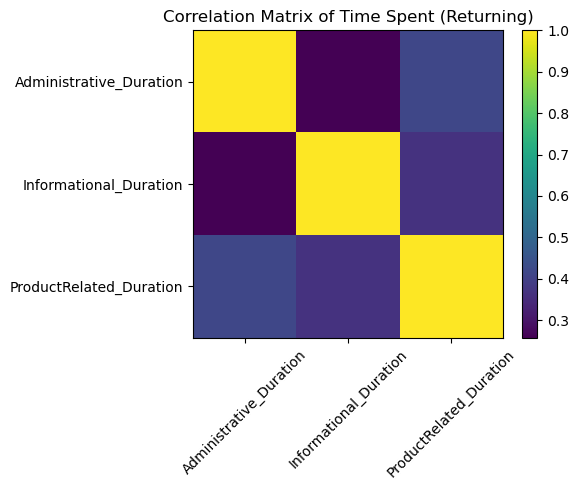

In [6]:
### 6.1 Visulaize Correlation Heatmap
plt.figure(figsize= (6, 5))
plt.imshow(corr_mat, interpolation='nearest', aspect= 'auto')
plt.colorbar()
plt.xticks(range(len(dur_cols)), dur_cols, rotation= 45)
plt.yticks(range(len(dur_cols)), dur_cols)
plt.title('Correlation Matrix of Time Spent (Returning)')
plt.tight_layout()
plt.show

In [7]:
### 6.2 Extract Strongest Correlation
# Flatten and filter
pairs = corr_mat.unstack()
real_pairs = pairs[pairs<1].drop_duplicates()
# Identify top
top_pair = real_pairs.idxmax()
top_value = round(real_pairs.max(), 3)
top_correlation = {'pair': top_pair, 'correlation': top_value}
top_correlation

# > Restult: 'top_correlation' dictionary with the strongest duration pair and its correlation.

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'),
 'correlation': 0.417}

In [8]:
## 7 . Step 3 BinomiaL  Probability for Campaign
# Original rate for returning
orig_rate = purchase_rates['Returning_Cutomer']
# Boost by 15%
boosted_rate = orig_rate * 1.15

# Binomial parameters
n, k = 500, 100

# Probability of >= 100 successes
prob_at_least_100_sales = binom.sf (k-1, n , boosted_rate)
prob_at_least_100_sales

0.9226831294359368

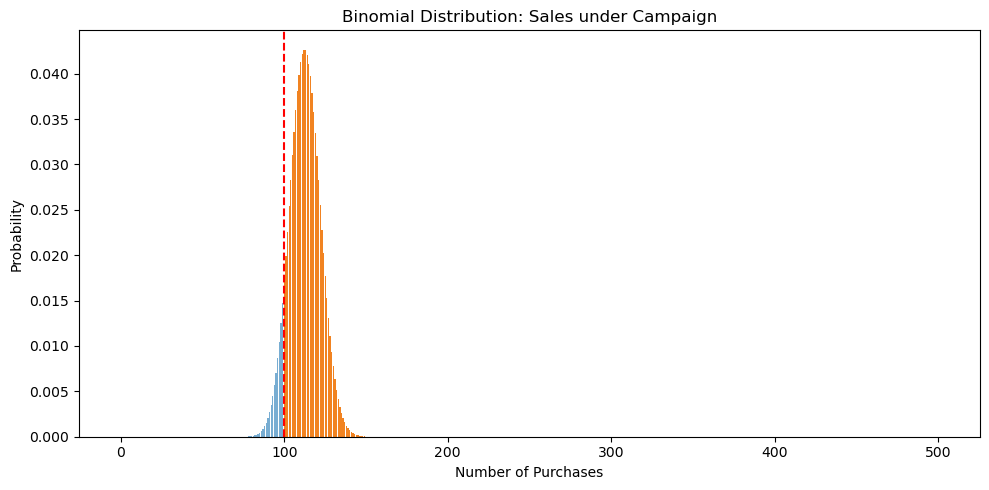

In [9]:
### 7.1 Visualize the Distrubution
# Compute PMF 
x = np. arange(0, n+1)
pmf = binom.pmf(x, n, boosted_rate)

plt.figure(figsize=(10, 5))
plt.bar(x, pmf, alpha=0.6)
plt.bar(x[x>=k], pmf[x>=k], alpha=0.9)
plt.axvline(k, color='red', linestyle='--')
plt.title('Binomial Distribution: Sales under Campaign')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

# >Result: Visual shows probability mass across outcomes, highlighting the region ≥100.

## 8. Conclusions & Recommendations

- **Purchase Rates:** The purchase rate for returning customers is 0.196, while for new customers, it is 0.273. The new customers show a slightly higher purchase rate, suggesting a need for targeted strategies to engage returning customers more effectively.

- **Behavior Correlation:** The strongest positive correlation (0.417) is found between `Administrative_Duration` and `ProductRelated_Duration`. This suggests that the more time returning customers spend on administrative tasks, the more likely they are to engage with product pages. Streamlining administrative tasks might improve product-related browsing and potential conversions.

- **Campaign Success Probability:** With a 15% boost in the purchase rate for returning customers, the probability of achieving at least 100 purchases out of 500 sessions is calculated as `prob_at_least_100_sales`. This value can be used to assess the potential success of the marketing campaign and guide investment decisions.